# 1- Apprentissage des paramètres d’un modèle à partir de données

## Question 1:

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import random

mat_transition=np.array([[2/3,1/3,0],
                        [0,5/6,1/6],
                        [0,0,1]])
print(mat_transition)

[[0.66666667 0.33333333 0.        ]
 [0.         0.83333333 0.16666667]
 [0.         0.         1.        ]]


## Question2:

In [2]:

data=np.loadtxt('data_exo1.txt')

In [3]:
#S=0 I=1 R=2
def matriceTransitions(data):
    """
    :data: base des données
    renvoie la matrice de transitions des états S , I et R
   """
    res=np.zeros((3,3))#matrice de trasitions des 3 états
    nb_s=0
    nb_i=0
    nb_r=0
    for i in range(len(data)):#on parcourt les états de chaque individu
        list_s=[s for s in data[i] if s==0]
        list_i=[j for j in data[i] if j==1]
        list_r=[r for r in data[i] if r==2]
        res[0][0]+=(len(list_s)-1)#prev=s cur=s
        res[0][1]+=1#prev=s cur=i
        res[1][1]+=(len(list_i)-1)#de i a i 
        res[1][2]+=1
        res[2][2]+=1
        nb_s+=len(list_s)
        nb_i+=len(list_i)
        nb_r+=len(list_r)
    res[0][0]=res[0][0]/nb_s
    res[0][1]=res[0][1]/nb_s
    res[1][1]=res[1][1]/nb_i
    res[1][2]=res[1][2]/nb_i
    res[2][2]=res[2][2]/len(data)
    return res

print(matriceTransitions(data))

[[0.92435703 0.07564297 0.        ]
 [0.         0.93527508 0.06472492]
 [0.         0.         1.        ]]


# 2- Description du premier modèle

### Question1:

In [4]:

##creer matrice 1
A=np.array([[0.92,0.08,0],
           [0,0.93,0.07],
           [0.,0.,1.]])

In [5]:
###verifier que stochastique
def is_stoch(mat):
    """mat:une matrice 
    renvoie true si mat est une matrice stochastique et false sinon"""
    (nb_lignes,nb_colonnes)=mat.shape
    if(nb_lignes!=nb_colonnes):#si elle n'est pas carrée
        return False
    elif np.all(np.linalg.eigvals(mat)>=0)==False:#verifer que tous les élements d'une matrice sont positifs
        return False
    for i in range(nb_lignes):
        if(np.sum(mat[i])!=1):#si une ligne ne vaut pas 1
            return False
    return True

In [6]:
print(is_stoch(matriceTransitions(data)))

True


### Question2:

In [7]:
Pi_0=[0.9,0.1,0]#vecteur d'états

## Distribution πt

### Question1:

In [8]:
Pi_1=Pi_0@A
print(Pi_1)

[0.828 0.165 0.007]


### Question2:

In [9]:
def distri_th(P_1,a,n):
    """
    P_1: vecteur de probabilités
    a : matrice de transition
    n : le nombre d'individus
    """
    Pi_t=P_1
    for i in range(n):
        Pi_t1=Pi_t@a
        Pi_t=Pi_t1
    return Pi_t1

print(distri_th(Pi_1,A,200))


[4.73800818e-08 2.99690557e-06 9.99996956e-01]


### Question3:

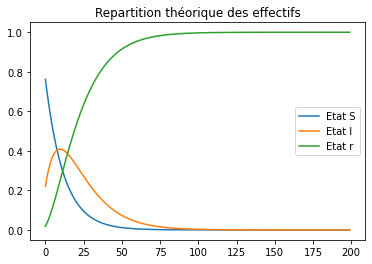

In [10]:

#question3:
def distri_graphique(P_1,a,t):#theorique
    """
    P_1: vecteur de probabilités
    a : matrice de transition
    n : le nombre d'individus
    représente la porbabilté dans chaque état en fonction du temps t
    """
    Pi_t=P_1
    Ys=[]
    Yi=[]
    Yr=[]
    X=[i for i in range(t)]
    for i in range(t):
        Pi_t1=Pi_t@a
        Pi_t=Pi_t1
        Ys.append(Pi_t1[0])
        Yi.append(Pi_t1[1])
        Yr.append(Pi_t1[2])
    #representation graphique
    plt.title("Repartition théorique des effectifs")
    plt.plot(X,Ys,label="Etat S")
    plt.plot(X,Yi,label="Etat I")
    plt.plot(X,Yr,label="Etat r")
    plt.legend()
    plt.show()
    
distri_graphique(Pi_1,A,200)

## Tirage Aléatoire

In [11]:
def gener_seq(P_0,mat_A,T):
    """
    P_0 : le vecteur de probabilités à l'état initial
    mat_A : la matrice de transition
    T : le temps
    renvoie  une séquence aléatoire de taille T"""
    etat_init=np.random.choice(range(len(P_0)),1,p=P_0)[0]
    seq=[etat_init]
    for i in range(T-1):
        etat=np.random.choice(range(len(P_0)),1,p=mat_A[etat_init])[0]
        seq.append(etat)
        etat_init=etat
    return seq



## Modélisation d'une population

### Question1:

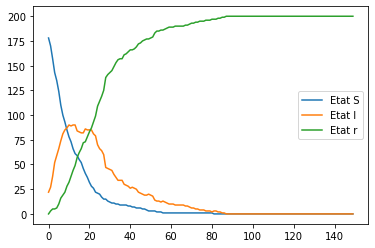

In [12]:
#fonction qui crée une séquence
def stats_pop(nb_individu,P_0,mat_A,T):
    """
    nb_individu : le nombre d'individus
    P_0 : le vecteur d'état initial
    mat_A : la matrice de transition
    T : le temps
    renvoie une matrice (nb_individu*T) qui génère pour chaque individu une séquence aléatoire .
    """
    mat_seq=np.zeros((nb_individu,T))
    for i in range(nb_individu):#on cree une matrice contenant les sequences pour chaque individu i
        mat_seq[i]=gener_seq(P_0,mat_A,T)
    return mat_seq
##dessiner les graphes
def evolution_individus(mat_seq,T):
    """
    mat_seq : matrice contenant des seéquences
    T : temps 
    représente l'évolution des individus dans les trois états en fonction du temps.
    """
    X=[t for t in range(T)]
    Ys=[]#la liste contenant le nombre d'état Sain à t
    Yi=[]#la liste contenant le nombre d'état infecté à t
    Yr=[]#la liste contenant le nombre d'état rétabli à t
    for t in range(T):
        etat_t=[e for e in mat_seq[:,t]]#colonne des etats a l instant t
        Ys.append(etat_t.count(0))
        Yi.append(etat_t.count(1))
        Yr.append(etat_t.count(2))
    #representation graphique
    plt.plot(X,Ys,label="Etat S")
    plt.plot(X,Yi,label="Etat I")
    plt.plot(X,Yr,label="Etat r")
    plt.legend()
    plt.show()

##appeler les fonctions 
mat_seq=stats_pop(200,Pi_0,A,150)
evolution_individus(mat_seq,150)

### Question2:

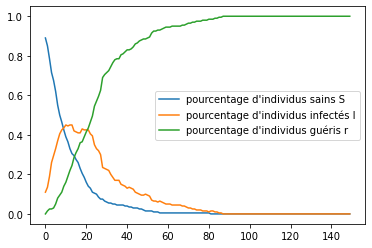

In [13]:
def graphe_pour(nb_individu,P_0,mat_seq,T):
    """
    nb_individu : le nombre d'individus
    P_0 : le vecteur d'état initial
    mat_seq : la matrice des sequences
    T : le temps
    affiche le pourcentage d’indivudus sains infectés et guéris en fonction du temps
    """
    X=[t for t in range(T)]
    Ys=[]
    Yi=[]
    Yr=[]
    for t in range(T):
        etat_t=[e for e in mat_seq[:,t]]#colonne des etats a l instant t
        Ys.append(etat_t.count(0)/nb_individu)
        Yi.append(etat_t.count(1)/nb_individu)
        Yr.append(etat_t.count(2)/nb_individu)
    #representation graphique
    plt.plot(X,Ys,label="pourcentage d'individus sains S")
    plt.plot(X,Yi,label="pourcentage d'individus infectés I")
    plt.plot(X,Yr,label="pourcentage d'individus guéris r")
    plt.legend()
    plt.show()
    return 
graphe_pour(200,Pi_0,mat_seq,150)

### Question 3 ( commentaire sur les graphes):

* Quand t est grand les proportions d'individus sains et infectés deviennent nulles.Par contre on remarque que la proportion des individus rétablis r est égale 1 ce qui est normal car comme on le voit dans le graphe une fois qu'on est dans l'état rétabli on ne peut plus y sortir ( r est absorbant)

### Question4

#### A- Simulations pour 5 individus:

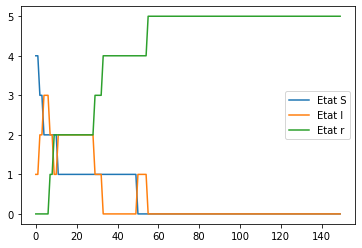

In [14]:
##evolution du nombre d'individus en fonction du temps 

mat5=stats_pop(5,Pi_0,A,150)
evolution_individus(mat5,150)

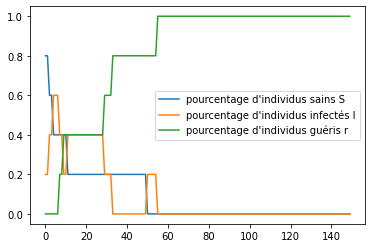

In [15]:
##evolution du pourcentage 
graphe_pour(5,Pi_0,mat5,150)

#### B- Simulations pour 5000 individus:

In [16]:
##evolution du nombre d'individus en fonction du temps 

#mat5000=stats_pop(5000,Pi_0,A,150)
#evolution_individus(mat5000,150)

In [17]:
##evolution du pourcentage 
#graphe_pour(5000,Pi_0,mat5000,150)

##### Commentaire :

- On remarque que l'évolution de la population est la meme pour différentes tailles de populations. En effet , à partir d'un certain temps t suffisamment grand le nombre d'infectés et de sains devient null et le nombre de personnes guérries stationne à 1 ( R est un état absorbant).

## PIC de l'épidémie

* Au pic de l'épidémie on a à peu près 83 infectés sur 200 individus. Le pic se produit au temps t=10

## Longueur de l'infection

### Question 1:

In [18]:
def longueur_seqI(sequence):
    """
    sequence : une sequence d'etats
    renvoie la longueur d'une sequence de I dans sequence
    """
    (l,c)=sequence.shape
    nb_I=0#nombre de cas infecté
    for i in range(l):
        tmp=[j for j in sequence[i]]
        nb_I+=tmp.count(1)-1
    return nb_I/l #les lignes representent la temps

print("La longueur moyenne d'une séquence de I est : {}".format(longueur_seqI(mat_seq)))

La longueur moyenne d'une séquence de I est : 13.975


### Question2:

* En considérant l'événement **passer de I à R** comme un succès, alors $p=0.07$ et $q=0.93$. Et on remarque que  la probabilité pour un individu de passer de **I** à **R** à un temps t=1 est égale à $0.93*0.07$. Et donc on peut généraliser cela pour un temps t=n avec la formule suivante : $0.93**(n-1)$*$0.07$ alors c'est une géométique paramètre $p=0.07$ et d'espérance $1/p$. Et pour avoir la longueur théorique d'une séquence d'infectés, il suffit donc juste de multiplier la formule ci-dessus par 200 (le nombre d'individus).

In [19]:
p=A[1][2]
longueur_th=1/0.07 

print("La longueur théorique d'une séquence de I est : {}".format(longueur_th))


La longueur théorique d'une séquence de I est : 14.285714285714285


### Question 3: Distribution théorique et observée de la longueur de l'infection

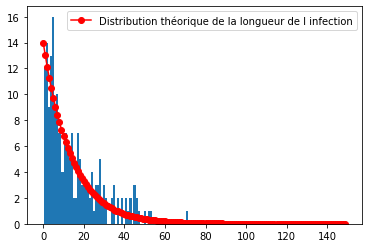

In [20]:
X=[t for t in range(150)]
###ditribution thr
q=1-p
Y_th=[]#len thr
for i in range(1,151):
    nb_individu=(q**(i-1))*p*200
    Y_th.append(nb_individu)
###disthr observée
(l,c)=mat_seq.shape
Y_obs=c*[0]
for i in range(l):
    tmp=[j for j in mat_seq[i]]
    t_infect=tmp.count(1)#le temps qu'un individu est resté infecté
    Y_obs[t_infect]+=1  
plt.plot(Y_th,'o-',color='red',label='Distribution théorique de la longueur de l infection')
plt.legend()
plt.bar(range(len(Y_obs)), Y_obs,width=1.05)
plt.show()
#l'histogramme en bleu représente la distribution onbservée de la longueur de l'infection

# 3- Modèle ergodique

## Analyse du modèle

### Question1

In [21]:
A_ergo=np.array([[0.92,0.08,0],
           [0,0.93,0.07],
           [0.02,0.,0.98]])


#### Répartition théorique des effectifs:

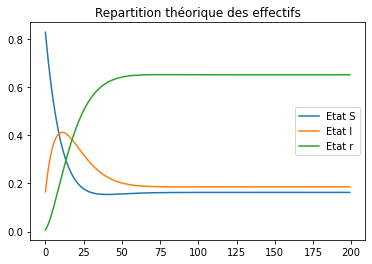

In [22]:
mat_ergo=stats_pop(200,Pi_0,A_ergo,150)

distri_graphique(Pi_0,A_ergo,200)

#### Distribution observe sur une population de 200 individus

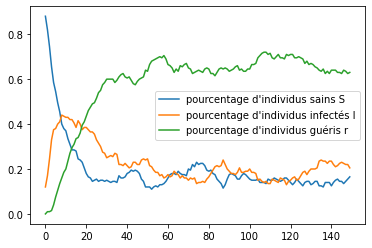

In [23]:
graphe_pour(200,Pi_0,mat_ergo,150)

#### Evolution de la populuation 
- Quand t est grand la proportion d'individus sains et infectés n'est plus nulle. Ce qui s'explique par le fait que R n'est plus un état abosorbant (on peut en sortir ) et donc un individu rétabli peut devenir sain par la suite avec une probabilité de 0.02 et celui-ci soit peut rester sain ou etre infecté encore une fois . Ce qui explique le fait que la proportion d'individus sains et infectés ne sera jamais nulle.

### Question 2

In [24]:
Pi0_ergo=[0.1,0.9,0]
Pi1_ergo=Pi0_ergo@A_ergo

#### Répartition théorique des effectifs ( t=0  avec 90% de I et 10% de S)

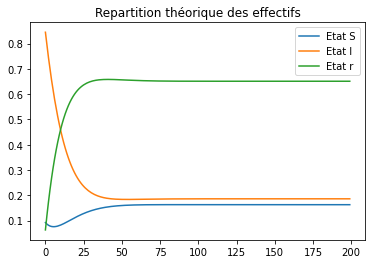

In [25]:
mat_seq_ergo=stats_pop(200,Pi0_ergo,A_ergo,150)
distri_graphique(Pi0_ergo,A_ergo,200)

#### Distribution observe sur une population de 500 individus (a t=0 avec 90% de I et 10% de S)

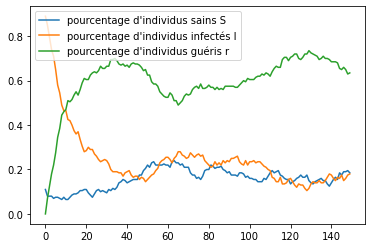

In [26]:
graphe_pour(200,Pi0_ergo,mat_seq_ergo,150)

#### Exploration

##### Avec 50% de S et 50% de I à t=0:

In [27]:
Pi0_i1=[0.5,0.5,0]
mat_seqI1=stats_pop(200,Pi0_i1,A_ergo,150)

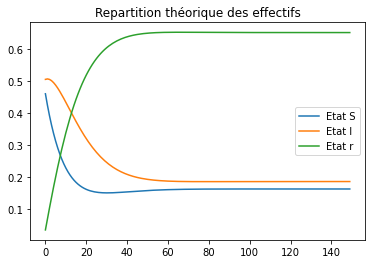

In [28]:
distri_graphique(Pi0_i1,A_ergo,150)

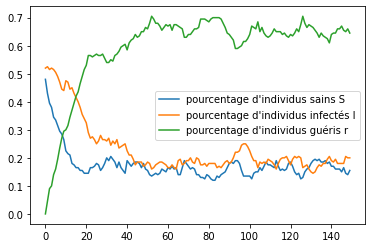

In [29]:
graphe_pour(200,Pi0_i1,mat_seqI1,150)

##### Avec 20% de S et 70% de I et 10% de R à t=0:

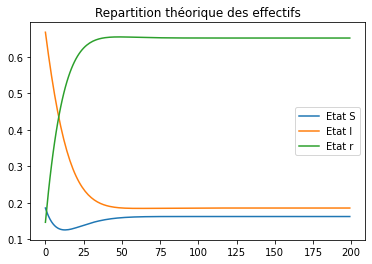

In [30]:
Pi0_i2=[0.2,0.7,0.1]
mat_seqI2=stats_pop(200,Pi0_i2,A_ergo,150)

distri_graphique(Pi0_i2,A_ergo,200)#théorique

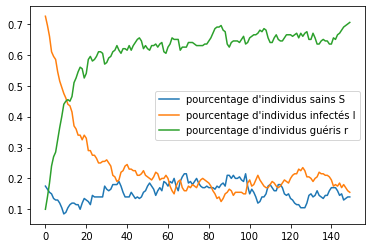

In [31]:
graphe_pour(200,Pi0_i2,mat_seqI2,150)#observée

##### Commentaire :

- On remarque que pour un t grand, quelque soit le probabilité de distribution initiale, le proportion de personnes guérries croit toujours et ensuite stationne à 0.65. Et les proportions des individus sains et infectés dans une population sont presque pareilles et ce car la probabilité de passer d'un état à un autre (par exemple de S à I ou de S à R) sont beaucoup plus petites que les probabilités de rester dans un état. Deplus , la probabilité de rester I et S sont pratiquement égales et celles-ci stagnent à partir d'un t très grand.

### Question 3

- Les états S, I et R sont transients , car on n'y reste pas infiniment (ils ne sont pas absorbants).
- La chaine n'est pas périodique car on peut rester dans le meme état à chaque fois. Donc pour aller de S à S ou de I à I le nombre d'état à tranverser est 1 Comme le PGCD(1,X)=1 alors cette chaine n'est pas périodique.
- Cette chaine est irréductible car on peut partout à partir de tous les états , ce qui se traduit par la connexité du graphe de transition.

### Question 4

In [32]:
A_ergo2=A_ergo@A_ergo
print(A_ergo)
print(A_ergo2)

[[0.92 0.08 0.  ]
 [0.   0.93 0.07]
 [0.02 0.   0.98]]
[[0.8464 0.148  0.0056]
 [0.0014 0.8649 0.1337]
 [0.038  0.0016 0.9604]]


- La matrice A * A représente les probabilités de joindre un état à partir d'un autre en 02 itérations.

In [33]:
if is_stoch(A_ergo2):
    sto="stochastique"
else: 
    sto="non stochastique"
print("La matrice A*A est : {}".format(sto))

La matrice A*A est : non stochastique


In [34]:
A_ergo3=A_ergo2@A_ergo
A_ergo4=A_ergo3@A_ergo

- Les matrices $A^3$ et $A^4$ représentent respectivement les probabilités de passer d'un état à un autre en 03 et 04 itérations.
- Les matrices $A^n$ représentent les probabilités de passer d'un état à un autre en n itérations.

### Question 5

#### Distribution de la probabilité stationnaire à partir de la matrice de transition:

In [35]:
#on calculer à partir du vecteur d'état initial jusuqu'à ce qu'il ne bouge plus
Pi_statio=Pi_0#on initialise le vecteur stationnaire

while not np.array_equal(Pi_statio,[p for p in (Pi_statio@A_ergo)]):
    Pi_statio=[p for p in (Pi_statio@A_ergo)]
print(Pi_statio)  

[0.16279069767441873, 0.18604651162790725, 0.6511627906976757]


#### Comparer les résultats pour t assez grand : 
- La distribution de probabilité stationnaire que l'on a calculée confrote nos observations sur les simulations (Cf.commentaire Q2). En effet, on a trouvé qu'à partir d'un t grand la probabilité d'etre dans un état R stagne à 0.65 (Cf.graphe des distributions ci-dessus). Quant à l'état S celle -ci stationne à 0.16  et à 0.18 pour l'état I ce qu'on peut voir sur nos graphes de simulations à partir d'un t grand.

## Longueur de l'immunité

### Question1

In [36]:
def longueur_seqR(sequence):
    """
    sequence : une sequence d'etats
    renvoie la longueur d'une sequence de R dans sequence
    """
    (l,c)=sequence.shape
    nb_R=0#nombre de cas infectés
    cpt=0
    for i in range(l):
        tmp=[j for j in sequence[i]]
        #on compte le nb de R avant d'arriver à un S
        for j in range(len(tmp)-1):
            if(tmp[j]==2):#on est à un état R
                cpt+=1
                if(tmp[j+1]==0):#on verifie que l'état suivant est S et on ajoute la longueur de R
                    nb_R+=cpt
                    cpt=0
                    break
    return nb_R/l #les lignes representent la temps

#tester
seq_ergo=stats_pop(200,Pi0_ergo,A_ergo,150)#genere une séquence
print("La longueur moyenne d'une sequence de R est :{}".format(longueur_seqR(seq_ergo)))

La longueur moyenne d'une sequence de R est :45.895


### Question2

In [37]:
p_r=A_ergo[2][0]#passer d'un état R à S (sortir de l'état R) 
len_th_seqR=1/p_r #longueur théorique d'une séquence de R 
print("La longueur moyenne observée d'une sequence de R est : {}".format(longueur_seqR(seq_ergo)))#longueur observée moyenne d'une séquence de R
print("La longueur théorique d'une sequence de R est : {}".format(len_th_seqR))


La longueur moyenne observée d'une sequence de R est : 45.895
La longueur théorique d'une sequence de R est : 50.0


### Question3

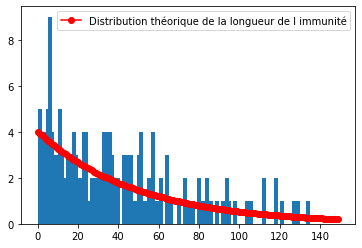

In [38]:
X=[t for t in range(150)]
###ditribution thr
q_r=1-p_r
Y_th=[]#len thr
for i in range(1,151):
    nb_individu=(q_r**(i-1))*p_r*200
    Y_th.append(nb_individu)
###disthr observée
(l,c)=seq_ergo.shape
Y_obs=c*[0]
for i in range(l):
    cpt=0
    t_immu=0
    tmp=[j for j in seq_ergo[i]]
    for j in range(len(tmp)-1):
        if(tmp[j]==2):#on est à un état R
            cpt+=1
            if(tmp[j+1]==0):#on verifie que l'état suivant est S et on ajoute la longueur de R
                t_immu+=cpt
                Y_obs[t_immu]+=1
                break  
plt.plot(Y_th,'o-',color='red',label='Distribution théorique de la longueur de l immunité')
plt.legend()
plt.bar(range(len(Y_obs)), Y_obs,width=2)
plt.show()
#l'histogramme en bleu représente la distribution onbservée de la longueur de l'immunité

## Modifier le modèle

In [39]:
#modifier la proba de passer de S à I
A_modif = np.array([[0.6,0.4,0],
           [0,0.93,0.07],
           [0.02,0.,0.98]])
mat_modif = stats_pop(200,Pi0_ergo,A_modif,150)

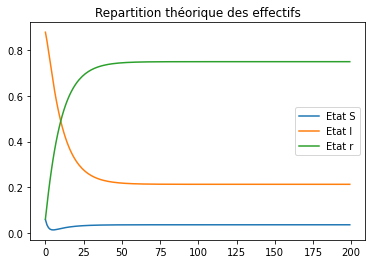

In [40]:
distri_graphique(Pi0_ergo,A_modif,200)

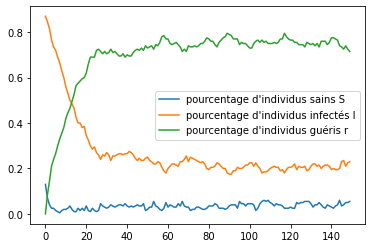

In [41]:
graphe_pour(200,Pi0_ergo,mat_modif,150)#observée

#### Commentaire sur l'évolution de l'épidemie

- On remarque sur les graphiques ci-dessus que le pourcentage d'individus **S** et **I** ne stagnent plus à la meme valeur pour un t grand. En effet, le pourcentage des personnes saines est infrieur au pourcentage des personnes infectées ( il est presque null). Car après avoir augmenté la probabilité de passer de **S** à **I** , on a réduit la probabilté de rester dans **S** (S->S), et comme pour retourner dans **S** après en etre sorti il faut passer par **R** et que la probabilité de passer de **R** à **S** est 0.02 alors cela devient plus rare d'avoir un patient sain.



#### Nouvelle distribution à l'équilibre

In [42]:
#on calculer à partir du vecteur d'état initial jusuqu'à ce qu'il ne change plus en utilisant la nouvelle matrice de transition
Pi_statio=Pi0_ergo #on initialise le vecteur stationnaire

while not np.array_equal(Pi_statio,[p for p in (Pi_statio@A_modif)]):
    Pi_statio=[p for p in (Pi_statio@A_modif)]
print("La nouvelle distribution à l'équilibre est : {}".format(Pi_statio)) 

La nouvelle distribution à l'équilibre est : [0.037433155080213915, 0.2139037433155085, 0.7486631016042784]


### Question 2

In [43]:
#modifier la proba de passer de R à S
A_modif2=np.array([[0.92,0.08,0],
           [0,0.93,0.07],
           [0.6,0.,0.4]])
mat_modif2 = stats_pop(200,Pi0_i1,A_modif2,150)

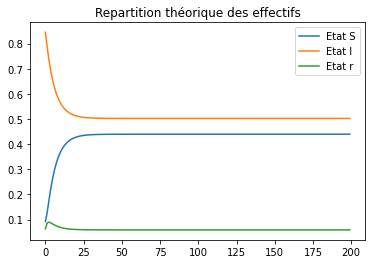

In [44]:
distri_graphique(Pi0_ergo,A_modif2,200)

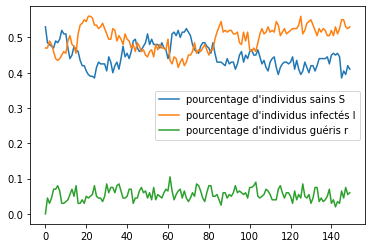

In [45]:
graphe_pour(200,Pi0_ergo,mat_modif2,150)#observée

#### Commentaire sur l'évolution de l'épidémie

- On remarque que le poucentage des personnes saines augmentent pour stager à partir de t=20, le pourcentage des personnes infectés lui décroit et stagnent à (à peu près la moitié de sa valeur) à partir de t=20. Quant aux pourcentage des individus guéris , celui reste très faible. Et ces résultats s'expliquent par le fait qu'on augmente la probabilité de passer de **R** à **S** et on réduit la probilité de rester dans **R**, ce qui augmente les chances d'avoir une personne saine. Vu que la probabilté de  passer de **I** à **R** est faible et qu'on a réduit la probabilité de rester dans **R** alors on aura forcément moins d'individus guérris car l'état actuel dépend de l'état précédent (chaine de Markov).

#### Nouvelle distribution à l'équilibre

In [46]:
#on calculer à partir du vecteur d'état initial jusuqu'à ce qu'il ne change plus en utilisant la nouvelle matrice de transition
Pi_statio=Pi0_ergo #on initialise le vecteur stationnaire

while not np.array_equal(Pi_statio,[p for p in (Pi_statio@A_modif2)]):
    Pi_statio=[p for p in (Pi_statio@A_modif2)]
print("La nouvelle distribution à l'équilibre est : {}".format(Pi_statio)) 

La nouvelle distribution à l'équilibre est : [0.4393305439330585, 0.5020920502092097, 0.05857740585774114]


# 4-  Confinement 

#### Question 1:


Le nombre de confinement est : 5
Le nombre de déconfinement est : 5
La période de confinement a duré : 67
La période de déconfinement a duré : 83


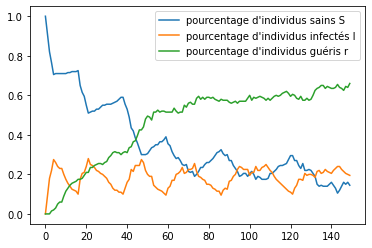

In [47]:
#non confinement : mat ergo
T=150
nb_indi=200
mat_lockdown=np.array([[1,0,0],
           [0,0.93,0.07],
           [0.02,0.,0.98]])
A_ergo=np.array([[0.92,0.08,0],
           [0,0.93,0.07],
           [0.02,0.,0.98]])

def lockdown_free(m_transi,mat_lockdown,Pi,nb_individus,T):
    """
    m_transi : matrice hors confinement
    mat_lockdown : matrice en cas de confinement
    Pi : vecteur de probabilités
    nb_individus : le nombre d'individus
    T : temps T
        Cette fonction represente les périodes de confinements et déconfinements et calcule la durée de celles-ci
    """
    mat=np.zeros((nb_individus,T))
    confinement=False#vaut True s'il n y a pas confinement et false sinon
    nb_confi=0 ; nb_deconfi=0
    t_confi=0 ; t_deconfi=0
    debu_c=0; fin_c=0; 
    #Le pourcentage de chaque état à t=0
    Yi=[[e for e in mat[:,0]].count(1)/nb_individus ]
    Ys=[[e for e in mat[:,0]].count(0)/nb_individus ]
    Yr=[[e for e in mat[:,0]].count(2)/nb_individus ]
    for t in range(1,T):#le premier état est toujours 
        mat_trans=mat_lockdown if confinement else m_transi
        #compter temps confinement est déconfinement 
        for n in range(nb_individus):
            etat_prec=mat[n][t-1]
            P_0=[e for e in mat_trans[int(etat_prec)]]
            mat[n][t] = np.random.choice(range(len(P_0)),p=P_0)#choisir l'état à t en fonction de l'état à t-1
        #calculer le pourcentages des I, S et R
        pourc_I = [e for e in mat[:,t]].count(1)/nb_individus 
        pourc_S = [e for e in mat[:,t]].count(0)/nb_individus 
        pourc_R = [e for e in mat[:,t]].count(2)/nb_individus 
        Yi.append(pourc_I)
        Ys.append(pourc_S)
        Yr.append(pourc_R)
        if confinement and pourc_I <= 0.1:#on lève le confinement
            confinement=False
            nb_deconfi+=1 
            fin_c=t
            t_confi+=fin_c-debu_c
        elif not confinement and pourc_I >=0.25:#on instaure le confinement
                confinement=True
                nb_confi+=1
                debu_c=t#debut du confi
                
    print("Le nombre de confinement est : {}".format(nb_confi))
    print("Le nombre de déconfinement est : {}".format(nb_deconfi))
    
    print("La période de confinement a duré : {}".format(t_confi))
    print("La période de déconfinement a duré : {}".format(T-t_confi))
    
    #####representation graphique
    X=[t for t in range(T)]
    plt.plot(X,Ys,label="pourcentage d'individus sains S")
    plt.plot(X,Yi,label="pourcentage d'individus infectés I")
    plt.plot(X,Yr,label="pourcentage d'individus guéris r")
    plt.legend()
    plt.show()   
    return 
   

lockdown_free(A_ergo,mat_lockdown,[0.4,0.6,0],nb_indi,T)

#### Question2:

Le nombre de confinement est : 5
Le nombre de déconfinement est : 5
La période de confinement a duré : 67
La période de déconfinement a duré : 83


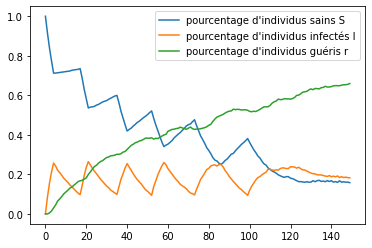

In [48]:
lockdown_free(A_ergo,mat_lockdown,[1,0,0],2000,150)

#### Question 3:
 D'après les simulations qu'on a effectué , il faut en moyenne $5$ confinements et déconfinements.

# 5- Optionnel 

##  Modifier les modèles:

### La taille de la population

Dans cette partie nous allons faire des silumations , en considérant les 02 modèles ergodique et non-ergodique afin de voir comment cela impacte sur les confinements et déconfinements.

#### A- Modèle non-ergodique


Le nombre de confinement est : 2
Le nombre de déconfinement est : 2
La période de confinement a duré : 35
La période de déconfinement a duré : 115


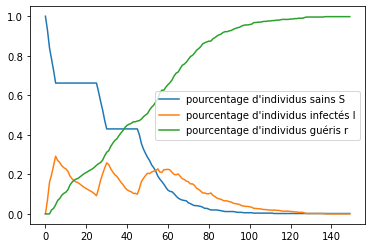

In [49]:
A = np.array([[0.92,0.08,0],
           [0,0.93,0.07],
           [0.,0.,1.]])
A_conf = np.array([[1,0,0],
           [0,0.93,0.07],
           [0.,0.,1.]])
Pi0 = [1,0,0]
nb_individus=500
T=150
lockdown_free(A,A_conf,Pi0,nb_individus,T)

#### B- Modèle ergodique

Le nombre de confinement est : 7
Le nombre de déconfinement est : 6
La période de confinement a duré : 80
La période de déconfinement a duré : 70


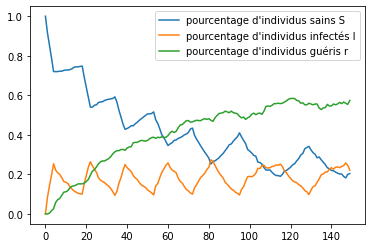

In [50]:
A = np.array([[0.92,0.08,0],
           [0,0.93,0.07],
           [0.02,0.,0.98]])
A_conf = np.array([[1,0,0],
           [0,0.93,0.07],
           [0.02,0.,0.98]])

lockdown_free(A,A_conf,Pi0,nb_individus,T)

#### Commentaire sur les deux modèles : 

On remarque que pour un meme nombre de population aussi grand soit il, le nombre de confinements pour le modèle ergodique est en moyenne de $5$ contre une moyenne de $2$ pour le modèle non-ergodique. Ceci est normal , car dans le modèle ergodique une personne guérrie peut devenir saine (R n'est pas un état absorbant) et donc etre infectée encore une fois ($R->S$, $ S->I$) contrairement au modèle non ergodique  ce qui explique donc le fait qu'il y ait plus de confinements dans le premier.


### La distribution de probabilité initiale 

A présent étudions , le nombre de confinements et déconfinements nécéssaires sur les deux modèles si on change la distribution de probabilité initiale en considérant qu'au temps initial il peut y avoir des inindividus sains et infectés 

#### A- modèle non ergodique

Le nombre de confinement est : 2
Le nombre de déconfinement est : 2
La période de confinement a duré : 28
La période de déconfinement a duré : 122


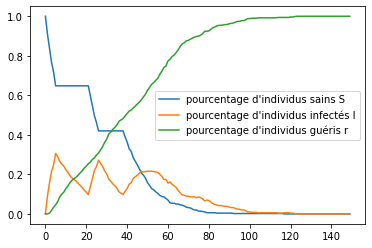

In [51]:
A = np.array([[0.92,0.08,0],
           [0,0.93,0.07],
           [0.,0.,1.]])
A_conf = np.array([[1,0,0],
           [0,0.93,0.07],
           [0.,0.,1.]])
nb_individus=500
T=150
Pi0 = [0.4,0.6,0]

lockdown_free(A,A_conf,Pi0,nb_individus,T)


#### B- modèle ergodique

Le nombre de confinement est : 4
Le nombre de déconfinement est : 4
La période de confinement a duré : 47
La période de déconfinement a duré : 103


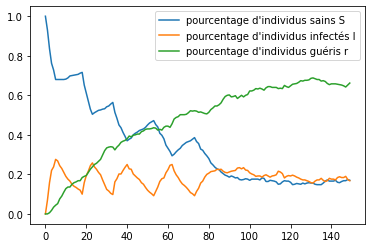

In [52]:
A = np.array([[0.92,0.08,0],
           [0,0.93,0.07],
           [0.02,0.,0.98]])
A_conf = np.array([[1,0,0],
           [0,0.93,0.07],
           [0.02,0.,0.98]])

lockdown_free(A,A_conf,Pi0,nb_individus,T)

#### Commentaire 

 On constate que lorsqu'on change la distribution initiale , pour  le modèle non-ergodique à partir d'un certain temps toutes les personnes guérrissent et donc les proportions de S et R deviennent nulles , contrairement au modèle ergodique ou les proportions des personnes saines et infectées se raprochent à partir d'un temps t.

### Les probabilités de transition 

### A- Modèle non ergodique

Le nombre de confinement est : 2
Le nombre de déconfinement est : 2
La période de confinement a duré : 5
La période de déconfinement a duré : 145


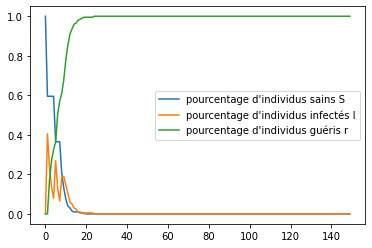

In [53]:
A = np.array([[0.6,0.4,0],
           [0,0.54,0.46],
           [0.,0.,1.]])
A_conf = np.array([[1,0,0],
           [0,0.54,0.46],
           [0.,0.,1.]])
Pi0 = [1,0,0]
nb_individus=200
T=150
lockdown_free(A,A_conf,Pi0,nb_individus,T)

### B- Modèle ergodique

Le nombre de confinement est : 2
Le nombre de déconfinement est : 2
La période de confinement a duré : 6
La période de déconfinement a duré : 144


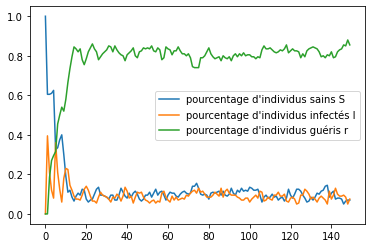

In [54]:
A = np.array([[0.6,0.4,0],
           [0,0.54,0.46],
           [0.05,0.,0.95]])
A_conf = np.array([[1,0,0],
          [0,0.54,0.46],
           [0.05,0.,0.95]])

lockdown_free(A,A_conf,Pi0,nb_individus,T)

#### Commentaire
On remarque ici que dans les 02 modèles on a eu besoin que de 02 confinements. Et qu'à partir d'un certain temps t tous les individus deviennent guérries et le pourcentage des personnes saines et infectées devient devient pratiquement nul.
Plus on a des personnes malades plus on a une plus grande immunité.

## Les remarques et critiques sur les modèles

-  On constate que le modèle ergodique est plus réaliste car celui-ci considère qu'à partir d'un certain temps assez grand une personne peut perdre son immunité et donc redevient sain et peut tomber malade encore une fois, ce qu'on voit très souvent dans la réalité ( comme c'est le cas pour le COVID 19). Le modèle où R est absorbant est donc idéaliste et considère qu'une immunité est infinie ce qui n'est pas vrai.
- Ces modèles montrent également que plus on a des personnes infectées plus on a une grande immunité , ce qui est généralement vrai mais pas tout le temps. Car cela dépend de la composition de la population , si on a énormément de personnes fragiles dans la population étudiée , alors on aura plus de personnes qui ne supporteront pas la maladie et qui y succombent malheureusement. 
- Deplus , considérer que tous les individus sont sains au début nous amène à nous poser cette question , comment ont alors été contaminés ces individus alors?